In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import mediapipe as mp
from findmouse import find_mouse
from buildmodel import SamModel
from show import show_box,show_anns
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

def image_show(image, nrows=1, ncols=1, cmap='gray'): 

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

    ax.imshow(image, cmap='gray')

    ax.axis('on')
    return fig, ax

In [2]:
sam_model=SamModel("sam_vit_h_4b8939.pth")
sam=sam_model.build()



In [3]:
mask_generator = SamAutomaticMaskGenerator(model=sam,
    points_per_side=32,
    pred_iou_thresh=0.86,
    stability_score_thresh=0.92,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,)

# Pridict

In [7]:
import os
import json
#import tqdm
from tqdm.notebook import tqdm

def boxAinB(a,b):
    return a[0]>=b[0] and a[2]<=b[2] and a[1]>=b[1] and a[3]<=b[3]


file_path='../data'
out_put='../output'
i=0
for file in tqdm(os.listdir(file_path)):
    i+=1
    #if i>5:
    #    break
    
    file_name=f'{out_put}/{file.split(".")[0]}.png'
    
    img=cv2.imread(file_path+'/'+file)

    h, w, d = img.shape
    img=cv2.resize(img, (1000, int(1000*h/w)), interpolation=cv2.INTER_AREA)#固定大小

    cuted, box=find_mouse(img)
    img=img[box[1]-20:box[3]+20,box[0]-20:box[2]+20]
    cv2.imwrite(file_name,img)
    
    
    masks = mask_generator.generate(img)

    np_path=f'{out_put}/{file.split(".")[0]}.npy'
    np.save(np_path, masks)

    
    
    




  0%|          | 0/302 [00:00<?, ?it/s]

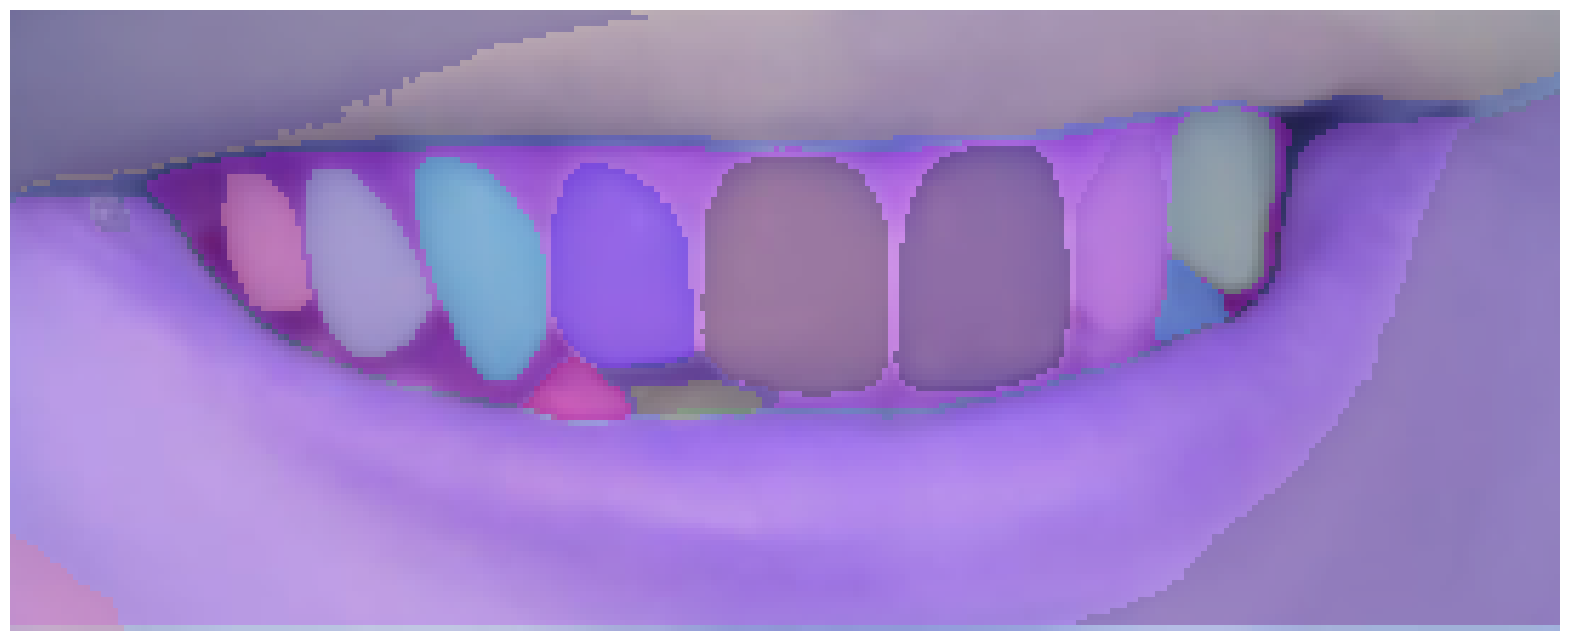

In [8]:
rd='00103'

masks=np.load(f'../output/{rd}.npy',allow_pickle=True)
img=cv2.imread(f'../output/{rd}.png')

plt.figure(figsize=(20,20))
plt.imshow(img)
show_anns(masks)
show_box(box,plt.gca())
plt.axis('off')
plt.show()